In [324]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

In [325]:
df = pd.read_csv('earl694412-infinite-matchhistory1124.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            432 non-null    object 
 1   Player          432 non-null    object 
 2   MatchId         432 non-null    object 
 3   Map             432 non-null    object 
 4   Category        432 non-null    object 
 5   Playlist        432 non-null    object 
 6   Input           432 non-null    object 
 7   Queue           432 non-null    object 
 8   Csr             432 non-null    int64  
 9   Mmr             1 non-null      float64
 10  Outcome         432 non-null    object 
 11  Accuracy        432 non-null    float64
 12  DamageDone      432 non-null    int64  
 13  DamageTaken     432 non-null    int64  
 14  ShotsFired      432 non-null    int64  
 15  ShotsLanded     432 non-null    int64  
 16  ShotsMissed     432 non-null    int64  
 17  KD              432 non-null    flo

In [326]:
df['Date'] = pd.to_datetime(df['Date'])
df['LengthMinutes'] = df['LengthSeconds'] / 60
df['DamageRatio'] = df['DamageDone'] / df['DamageTaken']
df['Damage/Kill'] = df['DamageDone'] / df['Kills']
df['Kills/10Min'] = (df['Kills'] / df['LengthMinutes']) * 10
df['Deaths/10Min'] = (df['Deaths'] / df['LengthMinutes']) * 10
df['Assists/10Min'] = (df['Assists'] / df['LengthMinutes']) * 10
df['Dmg/10Min'] = (df['DamageDone'] / df['LengthMinutes']) * 10
df['DmgT/10Min'] = (df['DamageTaken'] / df['LengthMinutes']) * 10
df['Shots/10Min'] = (df['ShotsFired'] / df['LengthMinutes']) * 10
df['ExcessKills'] = df['Kills'] - df['ExpectedKills']
df['ExcessDeaths'] = df['ExpectedDeaths'] - df['Deaths']
df['ExcessKD'] = df['KD'] - (df['ExpectedKills'] / df['ExpectedDeaths'])

df = df.drop(['Player', 'MatchId', 'Input', 'Queue', 'Mmr', 'Csr', 'ShotsFired', 
              'ShotsMissed', 'ShotsLanded', 'Betrayals', 'Suicides',
                'Perfects', 'Medals',
                'LengthSeconds'],axis=1)
dfR = df[df['Playlist'] == 'Ranked Arena']
dfRR = dfR[dfR['Date']> '2023-01-01']
dfRR = dfRR[dfRR['Outcome'] != 'Draw']
dfRR = dfRR[dfRR['Outcome'] != 'Left']
dfRR['Outcome'] = dfRR['Outcome'].map({'Win': 1, 'Loss': 0})
dfRR = dfRR.drop(['Date', 'Category', 'Playlist'], axis=1)
dfRR = dfRR.dropna()
dfRR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 140 to 431
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Map             242 non-null    object 
 1   Outcome         242 non-null    int64  
 2   Accuracy        242 non-null    float64
 3   DamageDone      242 non-null    int64  
 4   DamageTaken     242 non-null    int64  
 5   KD              242 non-null    float64
 6   KDA             242 non-null    float64
 7   Kills           242 non-null    int64  
 8   Deaths          242 non-null    int64  
 9   Assists         242 non-null    int64  
 10  ExpectedKills   242 non-null    float64
 11  ExpectedDeaths  242 non-null    float64
 12  Score           242 non-null    int64  
 13  LengthMinutes   242 non-null    float64
 14  DamageRatio     242 non-null    float64
 15  Damage/Kill     242 non-null    float64
 16  Kills/10Min     242 non-null    float64
 17  Deaths/10Min    242 non-null    f

In [327]:
def cnt(df, col):
    count = df[col].count()
    return count
def sm(df, col):
    sum = df[col].sum()
    return sum
def avg(df, col, val=None):
    avg = round(sm(df, col) / cnt(df, col),val)
    return avg


In [328]:
corr_mtrx = dfRR.corr().abs()
print(corr_mtrx['Outcome'].sort_values(ascending=False))

Outcome           1.000000
Deaths/10Min      0.478287
Deaths            0.377655
DmgT/10Min        0.343830
KD                0.321408
ExcessDeaths      0.277775
DamageTaken       0.257372
KDA               0.257029
DamageRatio       0.250196
ExpectedDeaths    0.244566
Assists/10Min     0.216579
ExcessKD          0.198549
LengthMinutes     0.150721
Damage/Kill       0.115814
DamageDone        0.110290
Accuracy          0.070467
Kills/10Min       0.069242
ExcessKills       0.064683
Assists           0.064051
Kills             0.060779
Shots/10Min       0.049173
ExpectedKills     0.032387
Dmg/10Min         0.007800
Score             0.005751
Name: Outcome, dtype: float64


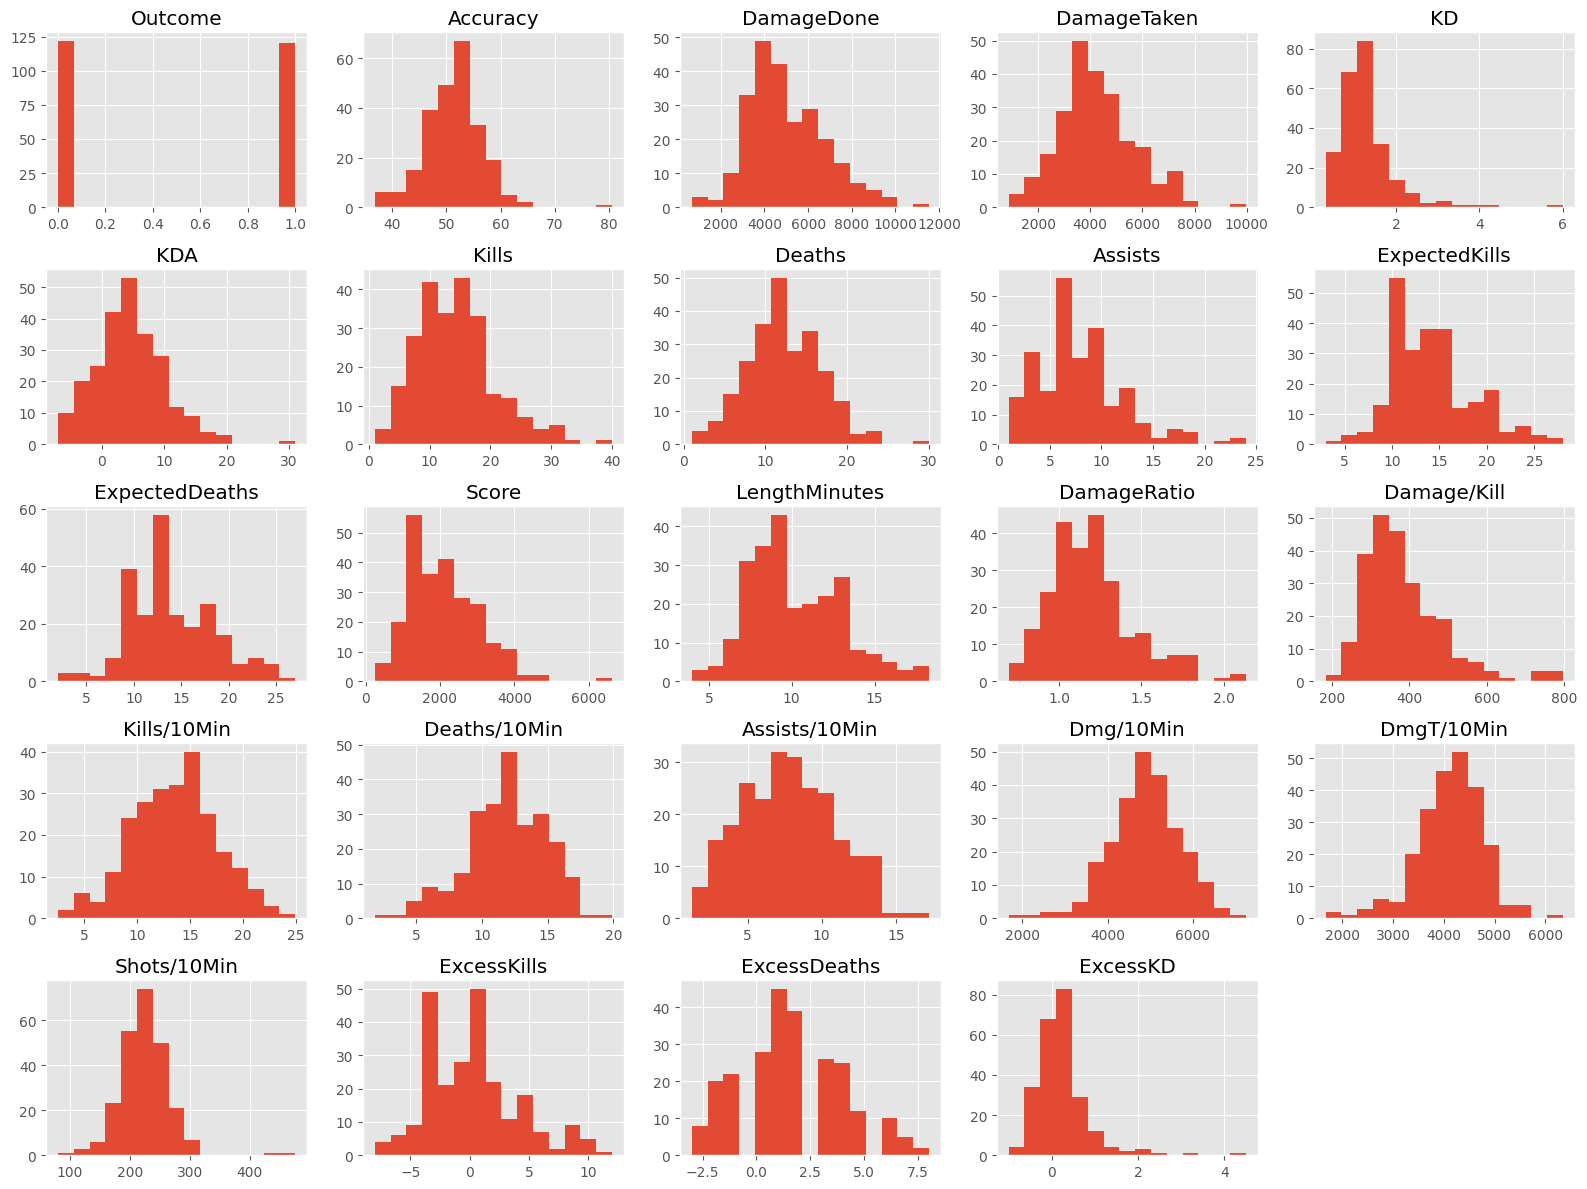

In [329]:
dfRR.hist(bins=15, figsize=(16, 12))
plt.tight_layout()
plt.show()

In [330]:
dfRR.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Outcome,242.0,0.495868,0.501019,0.000000,0.000000,0.000000,1.000000,1.000000
Accuracy,242.0,51.373430,5.298011,36.800000,48.205000,51.495000,54.280000,80.560000
DamageDone,242.0,5016.057851,1762.397044,667.000000,3769.500000,4671.500000,6186.500000,11536.000000
DamageTaken,242.0,4262.619835,1436.722534,875.000000,3340.250000,4040.000000,5107.750000,9962.000000
KD,242.0,1.267314,0.658676,0.310000,0.890000,1.180000,1.457500,6.000000
KDA,242.0,4.670207,5.668594,-7.000000,0.745000,4.660000,7.660000,31.000000
Kills,242.0,14.219008,6.442659,1.000000,10.000000,13.000000,18.000000,40.000000
Deaths,242.0,12.198347,4.666682,1.000000,9.000000,12.000000,15.000000,30.000000
Assists,242.0,7.954545,4.067124,1.000000,5.000000,7.500000,10.000000,24.000000
ExpectedKills,242.0,14.082645,4.326099,3.000000,11.000000,13.000000,16.000000,28.000000


In [331]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [332]:
# Define features (X) and target variable (y)
X = dfRR.drop('Outcome', axis=1) 
y = dfRR['Outcome'] 

print(f'X Shape: {X.shape}')
print(f'Y Shape: {y.shape}')

X Shape: (242, 24)
Y Shape: (242,)


In [333]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=2)
print(f'X Train Shape: {X_train.shape}')
print(f'X Test Shape: {X_test.shape}')

X Train Shape: (193, 24)
X Test Shape: (49, 24)


In [334]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['KD', 'KDA', 'Kills', 'Deaths', 'Assists', 'DamageDone', 'DamageTaken', 'DamageRatio', 
                                   'Damage/Kill', 'Kills/10Min', 'Deaths/10Min', 'Assists/10Min', 'Dmg/10Min', 'DmgT/10Min',
                                   'ExcessKills', 'ExcessDeaths', 'ExcessKD', 'ExpectedKills', 'ExpectedDeaths', 'Score', 'Shots/10Min']),
        ('cat', OneHotEncoder(), ['Map'])
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

In [335]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MSE_Histmean = mean_squared_error(y_test,np.full(y_test.shape,np.mean(y_train)))

def ResultsOut(model):
  y_pred = model.predict(X_test_preprocessed)
  # Calculate regression metrics
  acc = model.score(X_test_preprocessed, y_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r2 = r2_score(y_test, y_pred)
  oosr2 = 1-mean_squared_error(y_test,y_pred)/MSE_Histmean
  # Print the metrics with newline characters
  print("Acc: {:.3f}".format(acc))
  print("MAE: {:.2f}".format(mae))
  print("MSE: {:.2f}".format(mse))
  print("RMSE: {:.2f}".format(rmse))
  print("R^2 Score: {:.2f}".format(r2))
  print("OOS R^2 Score: {:.2f}".format(oosr2))
  return ''

def paramResults(mod):
    results_df = pd.DataFrame({'param': mod.cv_results_["params"], 'Accuracy': mod.cv_results_["mean_test_score"]})

    # Splitting the 'param' column into separate columns
    params_df = pd.DataFrame(results_df['param'].to_list())
    params_df.columns = [f"{col}_param" for col in params_df.columns]

    # Concatenating the new columns with the 'Accuracy' column
    results_df = pd.concat([params_df, results_df['Accuracy']], axis=1)

    # Displaying the updated DataFrame
    print(results_df)
    return ''

def featImport(mod):
    feat_importances = pd.DataFrame(mod.best_estimator_.feature_importances_[:20], index=X_train.columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    feat_importances.plot(kind='bar', figsize=(8,6))
    plt.show()

## Logistic Regression

In [336]:
# Unregularized Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(penalty=None)
logreg.fit(X_train_preprocessed, y_train)

print(f'Unregularized Logistic Regression Accuracy: {logreg.score(X_test_preprocessed, y_test)}')
print(ResultsOut(logreg))

Unregularized Logistic Regression Accuracy: 0.7959183673469388
Acc: 0.796
MAE: 0.20
MSE: 0.20
RMSE: 0.45
R^2 Score: 0.18
OOS R^2 Score: 0.19



## Ridge

In [337]:
# Ridge
# Need to find best params for param grid

C_grid = [10**-3,10**-2,10**-1,10**0,10**1,10**2]

param_grid={'C':C_grid}
ridge_cv = GridSearchCV(LogisticRegression(penalty='l2',solver='saga'),
                                          param_grid=param_grid,cv=5)
ridge_cv.fit(X_train_preprocessed,y_train)

print(ridge_cv.best_estimator_)
print(f'Ridge Accuracy: {ridge_cv.score(X_test_preprocessed, y_test)}')
ridge_cv.cv_results_
paramResults(ridge_cv)

LogisticRegression(C=100, solver='saga')
Ridge Accuracy: 0.8163265306122449
   C_param  Accuracy
0    0.001  0.704184
1    0.010  0.714980
2    0.100  0.751012
3    1.000  0.767206
4   10.000  0.793387
5  100.000  0.798516


''

In [338]:
ResultsOut(ridge_cv)

Acc: 0.816
MAE: 0.18
MSE: 0.18
RMSE: 0.43
R^2 Score: 0.26
OOS R^2 Score: 0.27


''

## Lasso

In [339]:
# Lasso

param_grid={'C':C_grid}
lasso_cv = GridSearchCV(LogisticRegression(penalty='l1',solver='saga'),
                                          param_grid=param_grid,cv=5)
lasso_cv.fit(X_train_preprocessed,y_train)

print(lasso_cv.best_estimator_)
print(f'Lasso Accuracy: {lasso_cv.score(X_test_preprocessed, y_test)}')
lasso_cv.cv_results_
paramResults(lasso_cv)


LogisticRegression(C=100, penalty='l1', solver='saga')
Lasso Accuracy: 0.8163265306122449
   C_param  Accuracy
0    0.001  0.502564
1    0.010  0.507692
2    0.100  0.709582
3    1.000  0.767341
4   10.000  0.783131
5  100.000  0.793387


''

In [340]:
ResultsOut(lasso_cv)

Acc: 0.816
MAE: 0.18
MSE: 0.18
RMSE: 0.43
R^2 Score: 0.26
OOS R^2 Score: 0.27


''

## ElasticNet

In [341]:
# ElasticNet

param_grid2={'C':C_grid,'l1_ratio':[.25, .5, .75]}

elastic_cv = GridSearchCV(LogisticRegression(penalty='elasticnet',solver='saga'),
                                            param_grid=param_grid2,cv=5)
elastic_cv.fit(X_train_preprocessed,y_train)

print(elastic_cv.best_estimator_)
print(f'ElasticNet Accuracy: {elastic_cv.score(X_test_preprocessed, y_test)}')
elastic_cv.cv_results_
paramResults(elastic_cv)

LogisticRegression(C=100, l1_ratio=0.25, penalty='elasticnet', solver='saga')
ElasticNet Accuracy: 0.8163265306122449
    C_param  l1_ratio_param  Accuracy
0     0.001            0.25  0.507692
1     0.001            0.50  0.513090
2     0.001            0.75  0.502564
3     0.010            0.25  0.647773
4     0.010            0.50  0.518219
5     0.010            0.75  0.513090
6     0.100            0.25  0.714845
7     0.100            0.50  0.704588
8     0.100            0.75  0.699595
9     1.000            0.25  0.772470
10    1.000            0.50  0.762078
11    1.000            0.75  0.767341
12   10.000            0.25  0.793387
13   10.000            0.50  0.788259
14   10.000            0.75  0.788259
15  100.000            0.25  0.798516
16  100.000            0.50  0.798516
17  100.000            0.75  0.798516


''

In [342]:
ResultsOut(elastic_cv)

Acc: 0.816
MAE: 0.18
MSE: 0.18
RMSE: 0.43
R^2 Score: 0.26
OOS R^2 Score: 0.27


''

## K-Nearest Neighbours

In [343]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1,50,3))
param_grid = {'n_neighbors': k_values}

knn_cv = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
knn_cv.fit(X_train_preprocessed,y_train)

print(knn_cv.best_estimator_)
print(f'K-Nearest Neighbors Accuracy: {knn_cv.score(X_test_preprocessed, y_test)}')
knn_cv.cv_results_
paramResults(knn_cv)

KNeighborsClassifier(n_neighbors=19)
K-Nearest Neighbors Accuracy: 0.673469387755102
    n_neighbors_param  Accuracy
0                   1  0.626991
1                   4  0.647638
2                   7  0.673414
3                  10  0.689204
4                  13  0.699460
5                  16  0.694197
6                  19  0.709717
7                  22  0.699190
8                  25  0.699325
9                  28  0.699190
10                 31  0.694062
11                 34  0.673279
12                 37  0.688664
13                 40  0.689069
14                 43  0.694197
15                 46  0.704453
16                 49  0.704453


''

In [344]:
ResultsOut(knn_cv)

Acc: 0.673
MAE: 0.33
MSE: 0.33
RMSE: 0.57
R^2 Score: -0.32
OOS R^2 Score: -0.29


''

## Random Forest

In [345]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {'n_estimators': [100,300,500],'max_depth': [10, 15, 20]}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=69,max_features='sqrt'),
                                                     cv=5, param_grid=param_grid_rf,n_jobs=-1)
rf_cv.fit(X_train_preprocessed, y_train)

print(rf_cv.best_estimator_)
print(f'Random Forest Accuracy: {rf_cv.score(X_test_preprocessed, y_test)}')
rf_cv.cv_results_
paramResults(rf_cv)

RandomForestClassifier(max_depth=15, random_state=69)
Random Forest Accuracy: 0.6938775510204082
   max_depth_param  n_estimators_param  Accuracy
0               10                 100  0.673009
1               10                 300  0.668016
2               10                 500  0.673279
3               15                 100  0.678273
4               15                 300  0.673144
5               15                 500  0.673279
6               20                 100  0.678273
7               20                 300  0.673144
8               20                 500  0.673279


''

In [346]:
ResultsOut(rf_cv)

Acc: 0.694
MAE: 0.31
MSE: 0.31
RMSE: 0.55
R^2 Score: -0.24
OOS R^2 Score: -0.21


''

<AxesSubplot: >

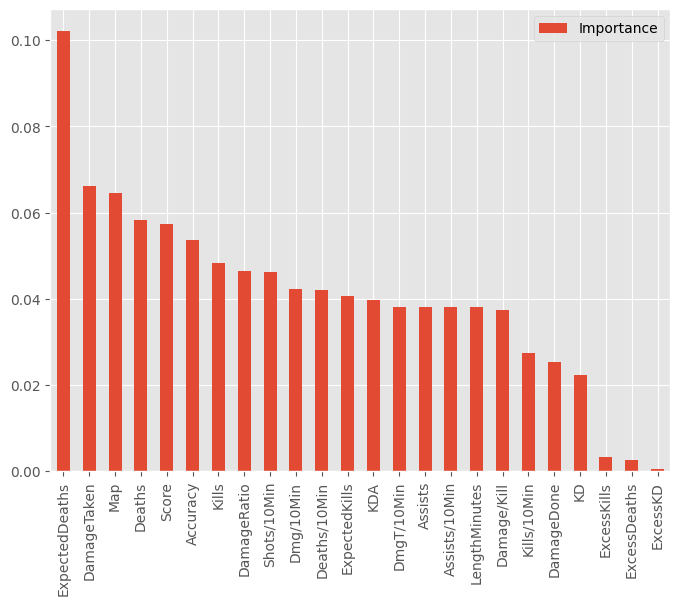

In [347]:
feat_importances = pd.DataFrame(rf_cv.best_estimator_.feature_importances_[:24], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Gradient Boosted Trees

In [348]:
# Gradient Boosted Trees
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gbrt = {'n_estimators': [100,300,500],'learning_rate': [0.01,0.1],'max_depth': [2,4,6], 'subsample': [0.5,1]}
GBRT = GridSearchCV(estimator=GradientBoostingClassifier(random_state=69),
                    cv=5, param_grid=param_grid_gbrt,n_jobs=-1)
GBRT.fit(X_train_preprocessed, y_train)

print(GBRT.best_estimator_)
print(f'Gradient Boosed Trees Accuracy: {GBRT.score(X_test_preprocessed, y_test)}')
GBRT.cv_results_
paramResults(GBRT)

GradientBoostingClassifier(max_depth=2, n_estimators=500, random_state=69,
                           subsample=0.5)
Gradient Boosed Trees Accuracy: 0.673469387755102
    learning_rate_param  max_depth_param  n_estimators_param  subsample_param  \
0                  0.01                2                 100              0.5   
1                  0.01                2                 100              1.0   
2                  0.01                2                 300              0.5   
3                  0.01                2                 300              1.0   
4                  0.01                2                 500              0.5   
5                  0.01                2                 500              1.0   
6                  0.01                4                 100              0.5   
7                  0.01                4                 100              1.0   
8                  0.01                4                 300              0.5   
9                  0.01

''

In [349]:
ResultsOut(GBRT)

Acc: 0.673
MAE: 0.33
MSE: 0.33
RMSE: 0.57
R^2 Score: -0.32
OOS R^2 Score: -0.29


''

<AxesSubplot: >

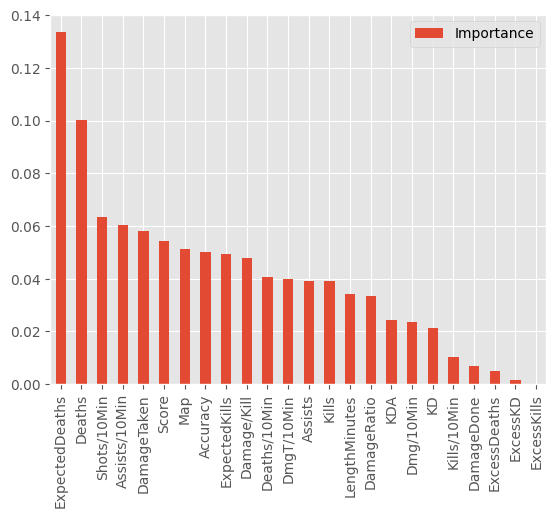

In [350]:
feat_importances = pd.DataFrame(GBRT.best_estimator_.feature_importances_[:24], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')

## XGBoost

In [351]:
from xgboost import XGBClassifier

param_grid_xgb = {'n_estimators': [25,50,100,150,200,250,300],'learning_rate': [0.001,0.01,0.1],'max_depth': [1,3,5,7,9]}
XGB = GridSearchCV(estimator=XGBClassifier(random_state=69), cv=5, param_grid=param_grid_xgb,n_jobs=-1)
XGB.fit(X_train_preprocessed, y_train)

print(XGB.best_estimator_)
print(f'XGBoost Accuracy: {XGB.score(X_test_preprocessed, y_test)}')
paramResults(XGB)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=69, ...)
XGBoost Accuracy: 0.7142857142857143
     learning_rate_param  max_depth_param  n_estimators_param  Accuracy
0                  0.001                1                  25  0.688934
1                  0.001                1                  50  0.688934
2

''

In [352]:
ResultsOut(XGB)

Acc: 0.714
MAE: 0.29
MSE: 0.29
RMSE: 0.53
R^2 Score: -0.15
OOS R^2 Score: -0.13


''

<AxesSubplot: >

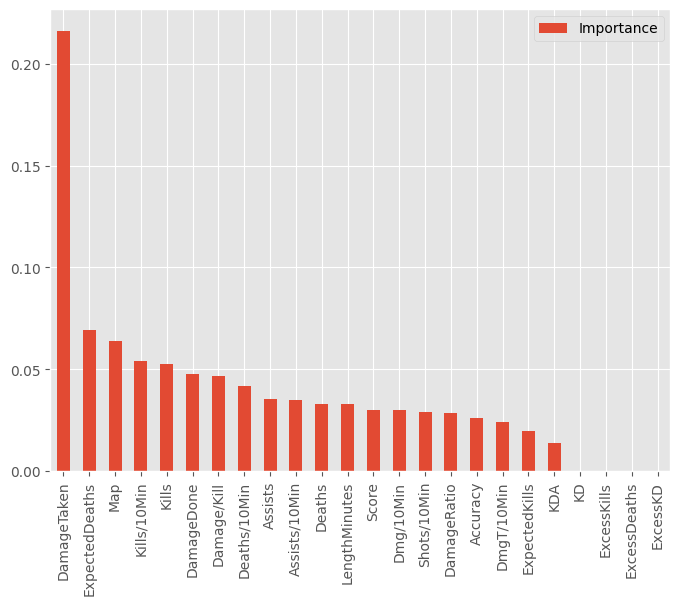

In [353]:
feat_importances = pd.DataFrame(XGB.best_estimator_.feature_importances_[:24], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

,Model,ACC,MAE,MSE,RMSE,R2,OOS R2
0,Ridge,0.816,0.184,0.184,0.429,0.258,0.272
1,Lasso,0.816,0.184,0.184,0.429,0.258,0.272
2,ElasticNet,0.816,0.184,0.184,0.429,0.258,0.272
3,Logistic Regression,0.796,0.204,0.204,0.452,0.175,0.191
4,XGBoost,0.714,0.286,0.286,0.535,-0.155,-0.133
5,Random Forest,0.694,0.306,0.306,0.553,-0.237,-0.214
6,K-Nearest Neighbors,0.673,0.327,0.327,0.571,-0.320,-0.295
7,Gradient Boosted Trees,0.673,0.327,0.327,0.571,-0.320,-0.295


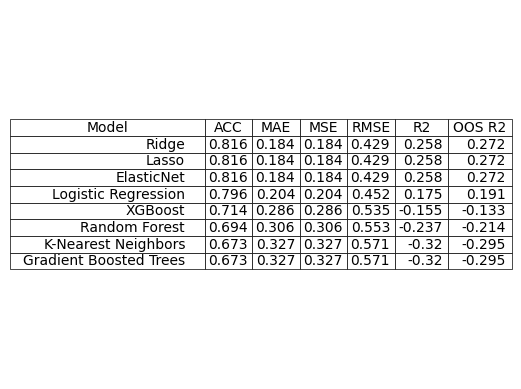

In [354]:
modelss = [logreg,ridge_cv,lasso_cv,elastic_cv,knn_cv,rf_cv,GBRT,XGB]
model_namess = ['Logistic Regression', 'Ridge', 'Lasso', 'ElasticNet',
              'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosted Trees', 'XGBoost']
def saveResults(models, model_names):
    # Initialize an empty dataframe to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'ACC' ,'MAE', 'MSE', 'RMSE', 'R2', 'OOS R2'])
    
    # Loop through each model and calculate the metrics
    for i, model in enumerate(models):
        # Generate predictions on the test set
        y_pred = model.predict(X_test_preprocessed)
        
        # Calculate regression metrics
        acc = round(model.score(X_test_preprocessed, y_test),3)
        mae = round(mean_absolute_error(y_test, y_pred),3)
        mse = round(mean_squared_error(y_test, y_pred),3)
        rmse = round(mean_squared_error(y_test, y_pred, squared=False),3)
        r2 = round(r2_score(y_test, y_pred),3)
        oosr2 = round(1-mean_squared_error(y_test,y_pred)/MSE_Histmean,3)
        
        # Add metrics to the dataframe
        metrics_df.loc[i] = [model_names[i],acc, mae, mse, rmse, r2, oosr2]
    
    metrics_df = metrics_df.sort_values('ACC', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots()
    table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns,
                     cellLoc='right', loc='center')
    table.auto_set_font_size(True)
    table.auto_set_column_width(col=list(range(len(metrics_df.columns))))
    ax.axis('off')
    plt.savefig('Model Results.png', dpi=300, bbox_inches='tight')
    
    return metrics_df

saveResults(modelss,model_namess)